Importing dependencies.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
# Loading dataset to pandas dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [35]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [36]:
insurance_dataset.shape

(1338, 7)

In [37]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [39]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [40]:
insurance_dataset['sex'] = insurance_dataset['sex'].map({'female': 0, 'male': 1})
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes': 0, 'no': 1})
insurance_dataset['region'] = insurance_dataset['region'].map({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

In [41]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,1,16884.92
1,18,1,33.8,1,1,0,1725.55
2,28,1,33.0,3,1,0,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [42]:
# data Analysis
insurance_dataset.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.795217,1.455157,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.130197,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,1.000000,0.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


/tmp/ipython-input-98032741.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


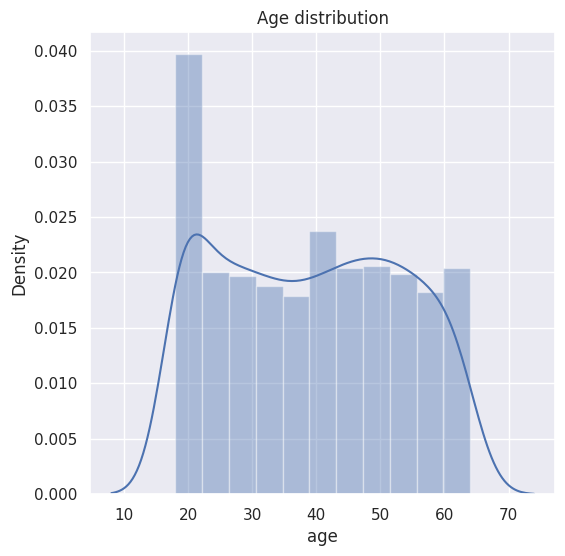

In [43]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

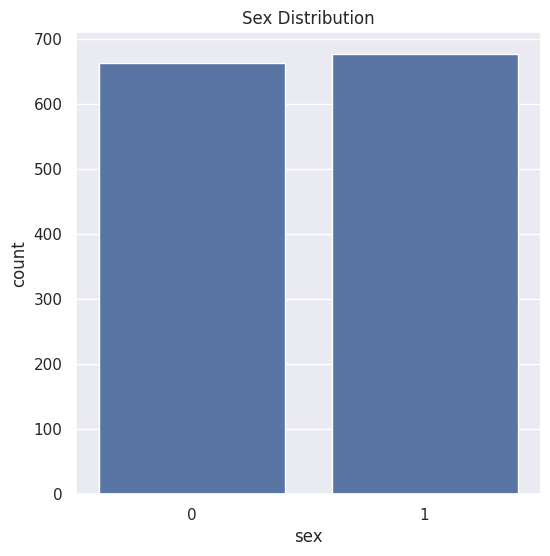

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-2924417019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


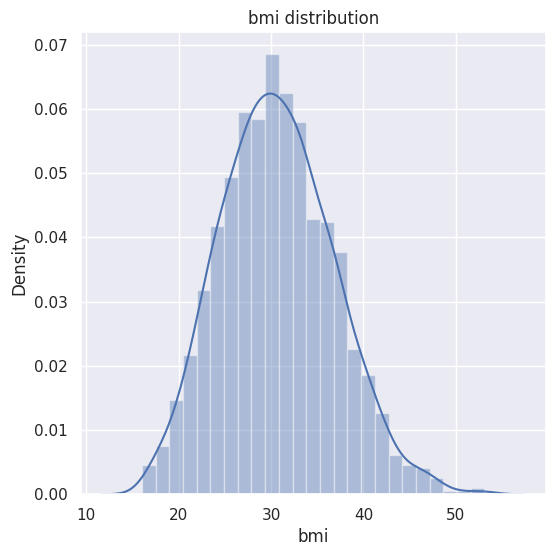

In [45]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

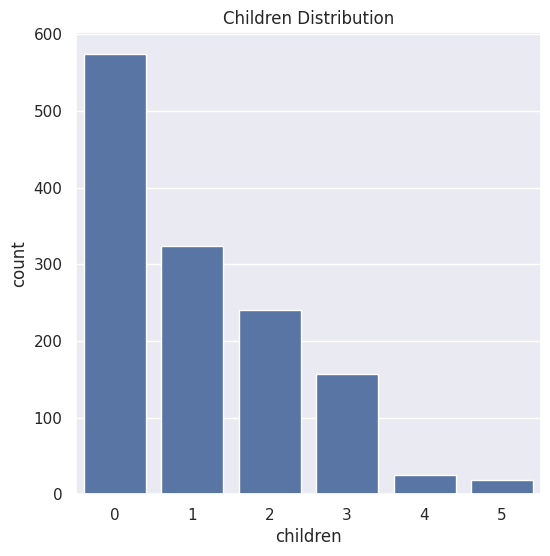

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

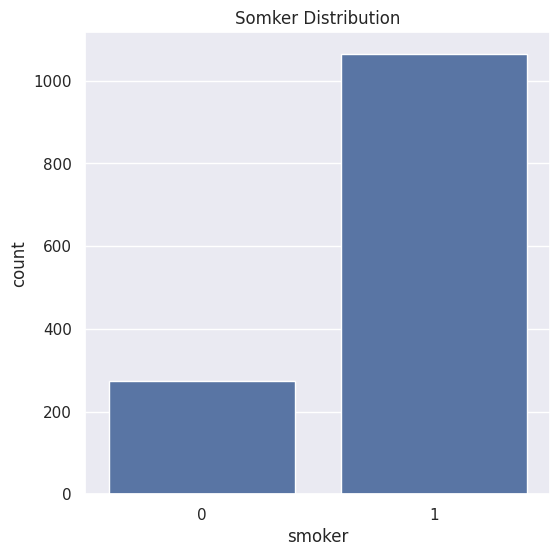

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Somker Distribution')
plt.show()

/tmp/ipython-input-1577745032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['expenses'])


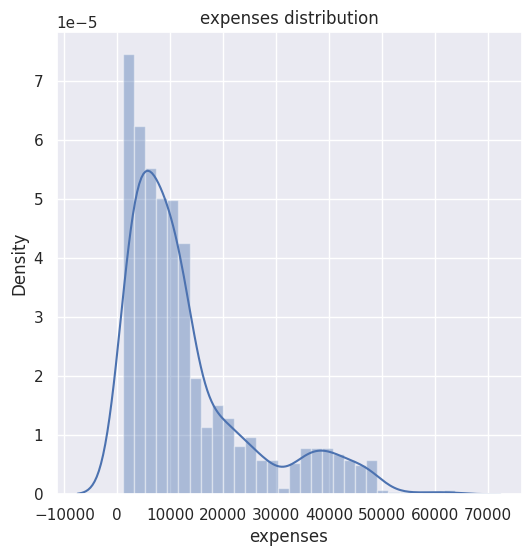

In [48]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['expenses'])
plt.title('expenses distribution')
plt.show()

In [50]:
# spltting the dataset
X = insurance_dataset.drop(columns='expenses', axis = 1)
Y = insurance_dataset['expenses']

In [51]:
print(X.shape, Y.shape)

(1338, 6) (1338,)


In [52]:
# splitting these datset into train and test datasets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [53]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


In [54]:
#loading the model instance.
mdl = LinearRegression()

In [55]:
mdl.fit(X_train, Y_train)

LinearRegression()

In [59]:
#predicting and finding error using training data
train_prediction = mdl.predict(X_train)
train_r2score = metrics.r2_score(Y_train, train_prediction)
print("error for training data: ", train_r2score)

error for training data:  0.751837854527264


In [60]:
#predicting and finding error using testing data
test_prediction = mdl.predict(X_test)
test_r2score = metrics.r2_score(Y_test, test_prediction)
print("error for testing data: ", test_r2score)

error for testing data:  0.7454563557182592


In [ ]:
# Further we can build a predictive system.